In [2]:
import os
from pathlib import Path
import sys
sys.path.extend(['../../', '../../base'])
import re
import numpy as np
import imageio
import cv2
from scipy.ndimage import morphology
import matplotlib.pyplot as plt
from base.utils.annotation_converter import AnnotationConverter
from base.utils.annotation_saver import AnnotationSaver

In [3]:
converter = AnnotationConverter(min_contour_area=10000, fix_ambiguity=True)
aida_ann = AnnotationSaver('17_A047-4463_153D+-+2017-05-11+09.40.22.ndpi', 'test', ['epithelium', 'lumen', 'background'])

In [4]:
tiles_dir = '/mnt/rescomp/users/achatrian/ProstateCancer/Dataset/data/network_outputs'
tile_paths = sorted((tile_path for tile_path in Path(tiles_dir).iterdir()), key=lambda path: int(str(path.name).split('_')[0]))

In [11]:
# extract offset coords from tile name
coords_pattern = '(\w{1,6})_(\w{1,6})_gland_lumen.png'
for tile_path in tile_paths:  # test on subsets of the tiles
    tile = imageio.imread(tile_path)
    coords_info = re.search(coords_pattern, Path(tile_path).name).groups()  # tuple with all matched groups
    tile_x, tile_y = tuple(int(num) for num in coords_info)
    contours, labels, boxes = converter.mask_to_contour(tile, tile_x, tile_y)
    for contour, label, box in zip(contours, labels, boxes):
        aida_ann.add_item(label, 'path', tile_rect=box)
        contour = contour.squeeze().astype(int).tolist()  # deal with extra dim at pos 1
        aida_ann.add_segments_to_last_item(contour)

In [ ]:
aida_ann_dir = '/home/andrea/Documents/Repositories/AIDA/dist/data/annotations'
aida_ann.dump_to_json(aida_ann_dir, suffix='original')

In [5]:
aida_ann.merge_overlapping_segments(parallel=True, log_dir='/home/andrea/Documents/Temp', max_iter=1)
aida_ann_dir = '/Users/andreachatrian/Documents/Repositories/AIDA/dist/data/annotations'
aida_ann.dump_to_json(aida_ann_dir)

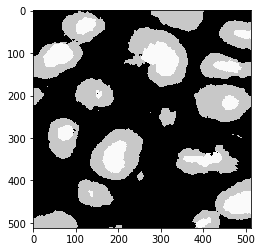

In [6]:
idx = 3
tile0 = imageio.imread(tile_paths[idx])
plt.imshow(tile0)

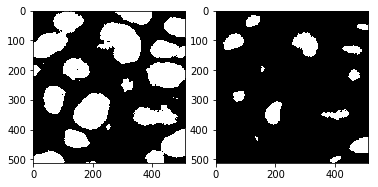

In [7]:
# show original class masks
binary_masks0 = []
for value in converter.label_value_map.values():
    if value == converter.label_value_map['background']:
        continue  # don't extract contours for background
    value_binary_mask = converter.threshold_by_value(value, tile0)
    binary_masks0.append(value_binary_mask)
fig, axes = plt.subplots(1, len(binary_masks0))
for i, axis in enumerate(axes):
    axis.imshow(binary_masks0[i] * 255)

/home/andrea/anaconda3/lib/python3.7/site-packages/skimage/morphology/extrema.py:239: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  image[sl] = value
/home/andrea/anaconda3/lib/python3.7/site-packages/skimage/morphology/extrema.py:242: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  image[sl] = value


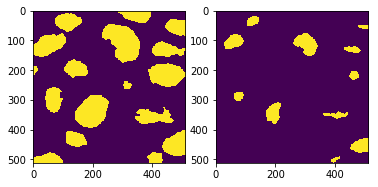

In [8]:
# show class masks
unambigous_masks0 = []
for mask in binary_masks0:
    umask = converter.remove_ambiguity(mask)
    unambigous_masks0.append(umask)
fig, axes = plt.subplots(1, len(binary_masks0))
for i, axis in enumerate(axes):
    axis.imshow(unambigous_masks0[i] * 255)

In [7]:
# debug error contours - assertion: this loop should end at close point
err_tiles = [
    '/mnt/rescomp/users/achatrian/ProstateCancer/Dataset/data/network_outputs/46496_24151_gland_lumen.png',
    '/mnt/rescomp/users/achatrian/ProstateCancer/Dataset/data/network_outputs/137128_52206_gland_lumen.png'
]

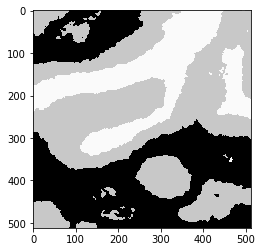

In [8]:
err_tile0 = imageio.imread(err_tiles[0])
plt.imshow(err_tile0)

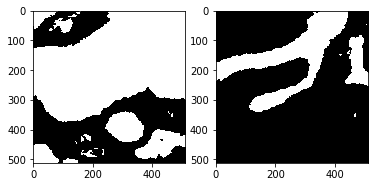

In [9]:
# show original class masks
binary_masks0 = []
for value in converter.label_value_map.values():
    if value == converter.label_value_map['background']:
        continue  # don't extract contours for background
    value_binary_mask = converter.threshold_by_value(value, err_tile0)
    binary_masks0.append(value_binary_mask)
fig, axes = plt.subplots(1, len(binary_masks0))
for i, axis in enumerate(axes):
    axis.imshow(binary_masks0[i] * 255)

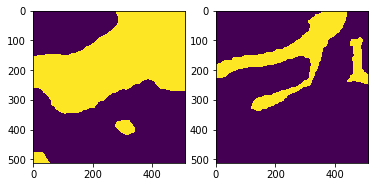

In [10]:
# show class masks
unambigous_masks0 = []
for mask in binary_masks0:
    umask = converter.remove_ambiguity(mask)
    unambigous_masks0.append(umask)
fig, axes = plt.subplots(1, len(binary_masks0))
for i, axis in enumerate(axes):
    axis.imshow(unambigous_masks0[i] * 255)